#노무현 대통령 취임사

In [1]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 32.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import re

import konlpy

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

이명박

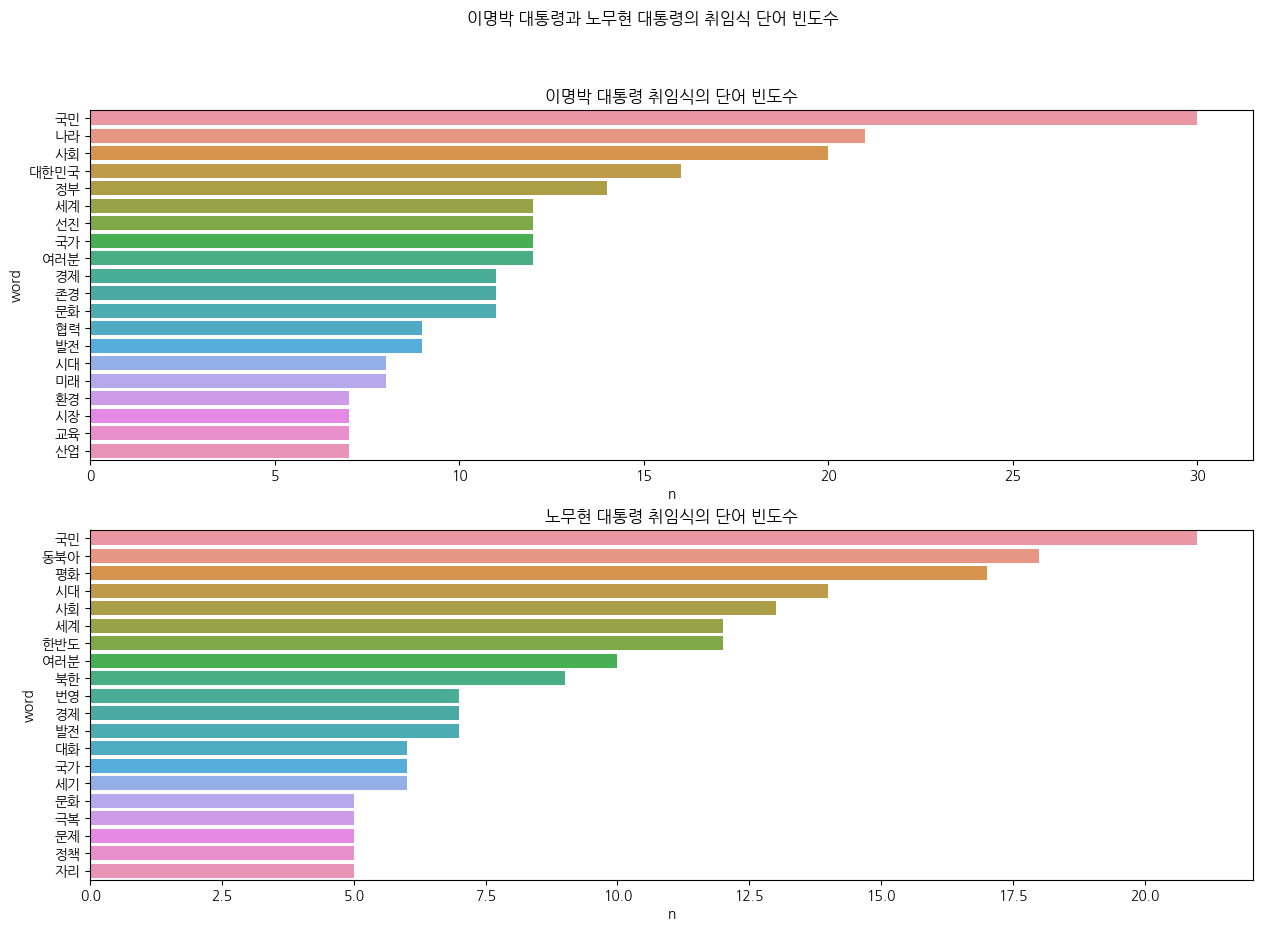

In [12]:
# 이명박 데이터 불러오기
yee = open("/content/이명박대통령 취임식.txt").read() # 정규식을 맞춰서 replace 해줌 / (가~힣이 아닌것을 띄어쓰기로 바꾸기)

# 한글만 남기고 전부 삭제제
yee = re.sub('[^가-힣]',' ',yee)

# 명사 추출
komoran = konlpy.tag.Komoran()
k_yee_nn = komoran.nouns(yee)

# 데이터 프레임 생성
k_yeeword_df = pd.DataFrame({'word':k_yee_nn})

# 단어의 수를 저장하는 컬럼 생성 -> 한단어는 삭제
k_yeeword_df['count'] = k_yeeword_df['word'].str.len()

# 한글자 단어를 삭제하고 글자수로 정렬
k_yeeword_df = k_yeeword_df.query('count >= 2').sort_values('count')

# 명사의 빈도표(데이터 프레임) 생성
k_yeeword_df = k_yeeword_df.groupby('word', as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)

# 단어 빈도 상위 20개 추출
k_ytop20 = k_yeeword_df.head(20)

# 단어 빈도표(딕셔너리) 생성
k_yword_dic = k_yeeword_df.set_index('word').to_dict()['n']


'''-------------------------------------------------------------------------'''

# 노무현 데이터 가져오기
muh = open('/content/노무현대통령_연설문.txt').read()

muh = re.sub('[^가-힣]', ' ', muh)

komoran = konlpy.tag.Komoran()
k_muh_nn = komoran.nouns(muh)

k_muword_df = pd.DataFrame({'word' : k_muh_nn})

k_muword_df['count'] = k_muword_df['word'].str.len()

k_muword_df = k_muword_df.query('count >= 2') # 두글자 이상만 출력

k_muword_df = k_muword_df.groupby('word', as_index = False).agg(n = ('word', 'count')).sort_values('n', ascending = False)

k_mutop20 = k_muword_df.head(20)

k_dic_word = k_muword_df.set_index('word').to_dict()['n'] 

'''-------------------------------------------------------------------------'''

# 단어 빈도 막대 그래프
# 이명박 취임 연설물 -> 국민, 나라, 사회, 대한민국, 정부, 세계
# 정부 정책 -> 발전, 환경, 교육, 시장

fig, axes = plt.subplots(2,1,figsize=(15,10))
plt.suptitle('이명박 대통령과 노무현 대통령의 취임식 단어 빈도수')

sns.barplot(data=k_ytop20, x='n', y='word', ax=axes[0])
axes[0].set_title('이명박 대통령 취임식의 단어 빈도수')

sns.barplot(data=k_mutop20, x='n', y='word', ax=axes[1])
axes[1].set_title('노무현 대통령 취임식의 단어 빈도수')

plt.show()

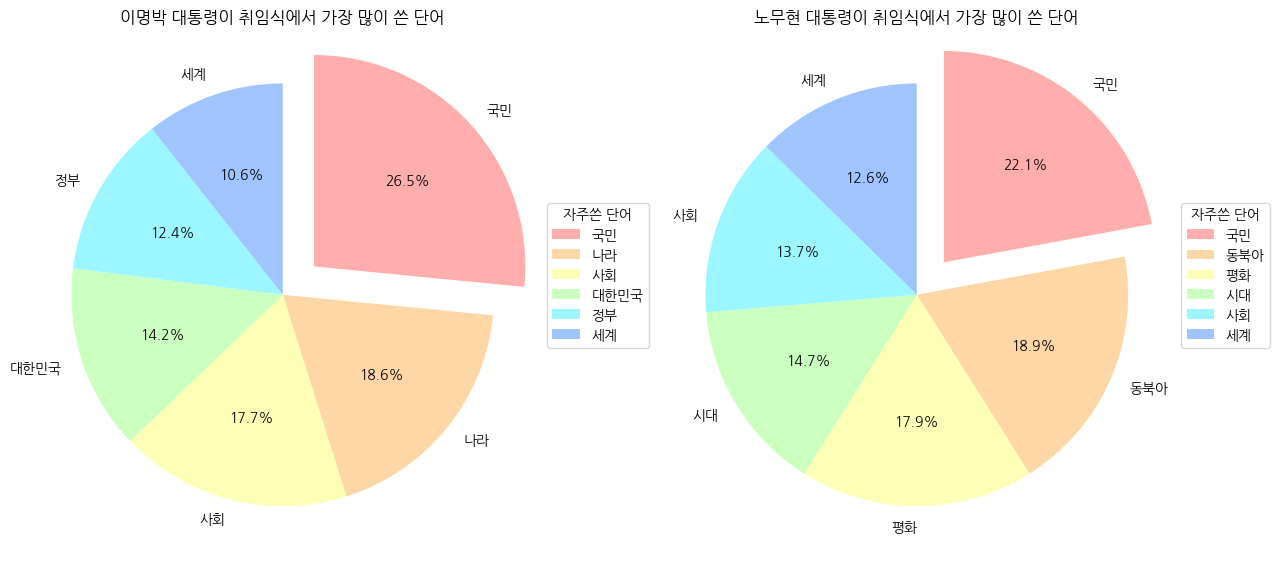

In [71]:
fig, axes = plt.subplots(1,2,figsize=(15,10))

k_mutop10 = k_mutop20.head(6)
explode = [0.2,0,0,0,0,0]
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']
axes[1].pie(k_mutop10['n'], labels=k_mutop10['word'], autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors)
axes[1].legend(loc=(1,0.4),title='자주쓴 단어')

k_ytop10 = k_ytop20.head(6)
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']
axes[0].pie(k_ytop10['n'], labels=k_ytop10['word'], autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=colors)
axes[0].legend(loc=(1,0.4),title='자주쓴 단어')

axes[0].set_title('이명박 대통령이 취임식에서 가장 많이 쓴 단어')
axes[1].set_title('노무현 대통령이 취임식에서 가장 많이 쓴 단어')

plt.show()

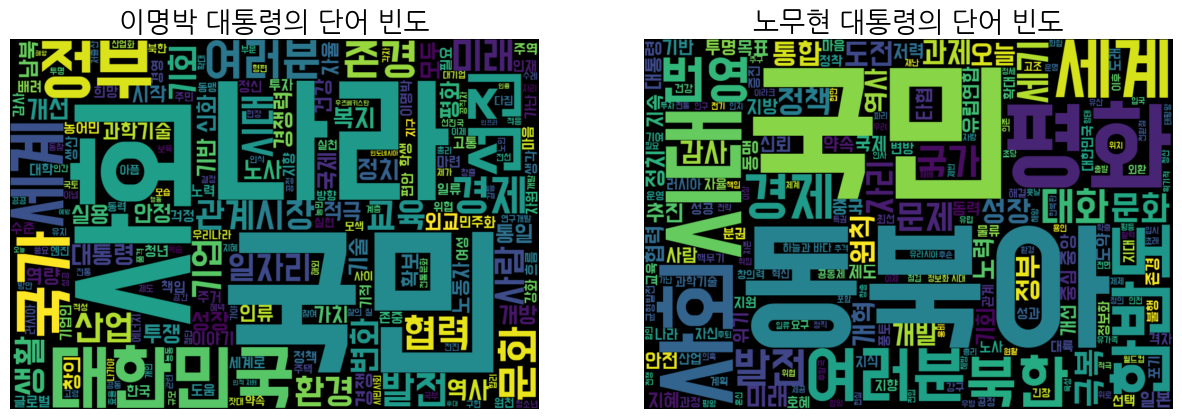

In [46]:
from wordcloud import WordCloud

# 폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

# 워드 클라우드 만들기 - 두 개 생성성
wc = WordCloud(width = 1000, height = 700, font_path = font_path)
img_wordcloud = wc.generate_from_frequencies(k_yword_dic) # 빈도수에 따라 크게 그려줌

wc_1 = WordCloud(width = 1000, height = 700, font_path = font_path)
img_wordcloud_no = wc_1.generate_from_frequencies(k_dic_word)

fig, axes = plt.subplots(1,2,figsize=(15,10))

axes[0].axis('off') # 눈금 없애기
axes[1].axis('off')

axes[0].imshow(img_wordcloud,interpolation='bilinear')
axes[1].imshow(img_wordcloud_no,interpolation='bilinear')

axes[0].set_title('이명박 대통령의 단어 빈도', fontsize = 20)
axes[1].set_title('노무현 대통령의 단어 빈도', fontsize = 20)

plt.show()

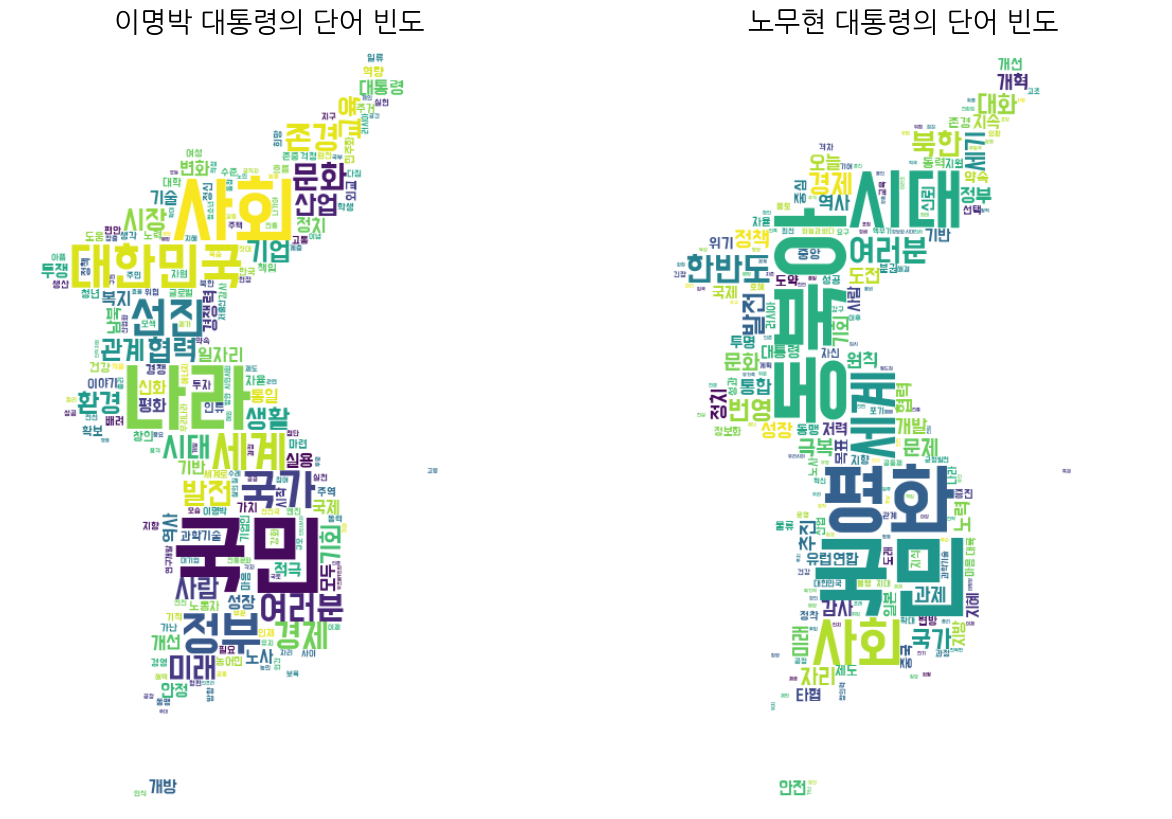

In [72]:
from PIL import Image # 이미지 불러오는 라이브러리
import numpy as np
from wordcloud import ImageColorGenerator

# 워드클라우드 Mask 설정을 위한 이미지 불러오기
icon = Image.open('/content/korea_mask.jpg')

korea_mask = np.array(icon) # 이미지를 배열로 만들기기

# 워드 클라우드 만들기
wc = WordCloud(background_color='white', width = 1000, height = 700, font_path = font_path,
               mask=korea_mask) # mask 속성을 추가해서 그려줌

wc_1 = WordCloud(background_color = 'white', width = 1000, height = 700, font_path = font_path,
               mask = korea_mask)

img_wordcloud = wc.generate_from_frequencies(k_yword_dic) # 빈도수에 따라 크게 그려줌

img_wordcloud_no = wc_1.generate_from_frequencies(k_dic_word)

fig, axes = plt.subplots(1,2,figsize=(15,10))

axes[0].axis('off') # 눈금 없애기
axes[1].axis('off')

axes[0].imshow(img_wordcloud,interpolation='bilinear')
axes[1].imshow(img_wordcloud_no,interpolation='bilinear')

axes[0].set_title('이명박 대통령의 단어 빈도', fontsize = 20)
axes[1].set_title('노무현 대통령의 단어 빈도', fontsize = 20)

plt.show()